In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import ast

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading output of GA algorithms from file
file_path = "output/results.csv"

results_df = pd.read_csv(file_path)
results_df.head(7)

,run_number,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,best_fitness_lst
0,1,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.520966649055481, 0.8256333470344543, 0.8726..."
1,2,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5569666624069214, 0.5575000047683716, 0.569..."
2,3,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.3711666762828827, 0.5481166839599609, 0.567..."
3,4,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.8169833421707153, 0.8779833316802979, 0.877..."
4,1,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.5535500049591064, 0.553683340549469, 0.7488..."
5,2,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.6256999969482422, 0.8153333067893982, 0.867..."
6,3,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.535966694355011, 0.5563499927520752, 0.6155..."


In [3]:
# Filling NaN values for 'torun_size' with "n/a" (will be useful for further grouping)
results_df = results_df.fillna({'tourn_size': 'n/a'})

# Convert string representation of arrays to actual arrays
results_df['best_fitness_lst'] = results_df['best_fitness_lst'].str.strip('[]').str.split(',').apply(lambda x: [float(val) for val in x])

In [4]:
############## CALCULATING ABF ##############

# Grouping runs of a certain configuration
configuration_columns = ["total_runs", "pop_size", "gens", "select", "crossover", "mutate", 
                         "xo_prob", "mut_prob", "tourn_size"]

# Group by the specified columns and calculate the mean values of arrays
grouped_ave = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result = grouped_ave.reset_index()
result = result.rename(columns={'best_fitness_lst': 'ABF'})

result

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF
0,4,20,5,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.7625875025987625, 0.8135041743516922, 0.839..."
1,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.5116500109434128, 0.5734666585922241, 0.650..."
2,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5665208324790001, 0.7023083418607712, 0.721..."
3,4,20,5,tournament_sel,single_point_co,inversion_mutation,0.9,0.1,4.0,"[0.6482708305120468, 0.7366458177566528, 0.766..."


In [5]:
############## CALCULATING Srandard Deviations ##############

# Group by the specified columns and calculate the mean values of arrays
grouped_std = results_df.groupby(configuration_columns)['best_fitness_lst'].apply(lambda x: np.std(x.tolist(), axis=0))

# Reset the index to convert the resulting Series back to a DataFrame
result_std = grouped_std.reset_index()
result_std = result_std.rename(columns={'best_fitness_lst': 'std'})

# Merge result_std to result:
merged_df = pd.merge(result, result_std, on=configuration_columns, how='inner')
merged_df

,total_runs,pop_size,gens,select,crossover,mutate,xo_prob,mut_prob,tourn_size,ABF,std
0,4,20,5,fps,arithmetic_xo,arithmetic_mutation,0.9,0.1,n/a,"[0.7625875025987625, 0.8135041743516922, 0.839...","[0.09044188919627982, 0.06228685133868387, 0.0..."
1,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,2.0,"[0.5116500109434128, 0.5734666585922241, 0.650...","[0.10937364838399893, 0.15905594056221095, 0.1..."
2,4,20,5,tournament_sel,arithmetic_xo,arithmetic_mutation,0.9,0.1,4.0,"[0.5665208324790001, 0.7023083418607712, 0.721...","[0.1605157164402597, 0.15067786898450475, 0.15..."
3,4,20,5,tournament_sel,single_point_co,inversion_mutation,0.9,0.1,4.0,"[0.6482708305120468, 0.7366458177566528, 0.766...","[0.12285312707613721, 0.17079294079489382, 0.1..."


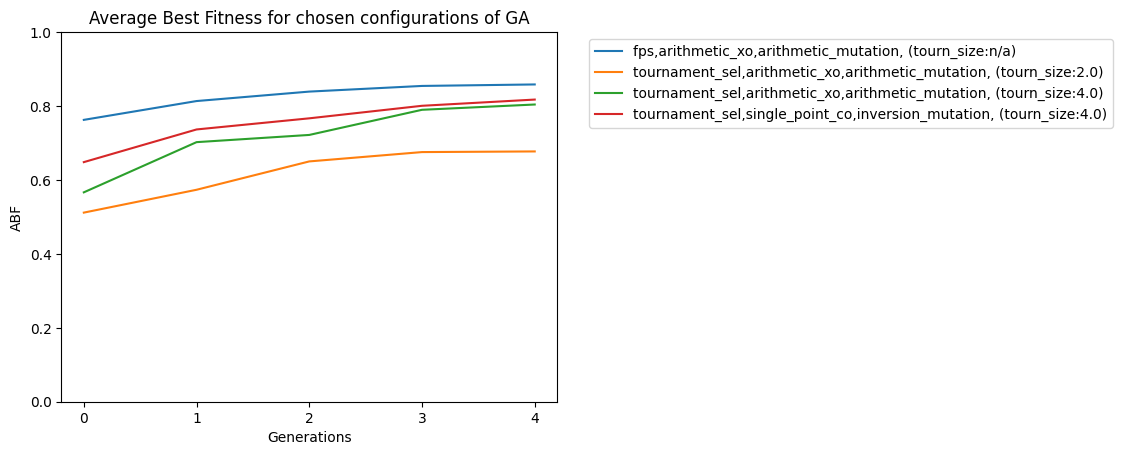

In [11]:
fig, ax = plt.subplots()

for index, row in merged_df.iterrows():
    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))
ax.set_ylim([0, 1])
ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_title('Average Best Fitness for chosen configurations of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

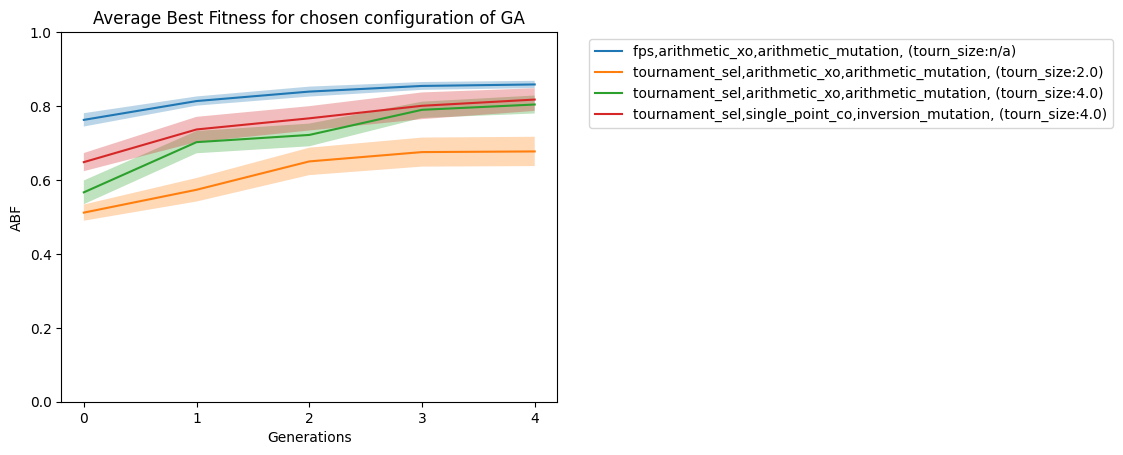

In [12]:
fig, ax = plt.subplots()

for index, row in merged_df.iterrows():
    upper_bound = row['ABF'] + 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2
    lower_bound = row['ABF'] - 0.2*row['std']    #!!!! needs to be changed: ideally, no 0.2

    ax.plot(row['ABF'], 
            label=f'{row["select"]},{row["crossover"]},{row["mutate"]}, (tourn_size:{row["tourn_size"]})')
    ax.fill_between(range(len(row['ABF'])), lower_bound, upper_bound, alpha=0.3)
    plt.xticks(range(len(row['ABF'])), range(len(row['ABF'])))

ax.set_xlabel('Generations')
ax.set_ylabel('ABF')
ax.set_ylim([0, 1])
ax.set_title('Average Best Fitness for chosen configuration of GA')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()